In [1]:
# ISTA, FISTA and IRLS example

using LinearAlgebra, PyPlot, Printf, SparseArrays, FFTW, SeisProcessing, SeisMain,SeisReconstruction
using BenchmarkTools


In [2]:
include("fista.jl")
include("ista.jl")
include("power_iteration.jl")
include("irls.jl")

IRLS (generic function with 1 method)

In [3]:
# Example y = A x + e, with x sparse and A a random matrix
# Problem is underdetemined M>N,where size of A is N x M.


 N = 80
 M = 150
 A = randn(N,M)
 
 
 xt = (Array(sprandn(M,1,0.2)))            # True
  y = A*xt                                 # Compressed signal y (observations)
  e = 0.00001*maximum(y)*randn(size(y))    # Add noise to observations
  y = y + e

  λ =  1.                                  # Trade-off parameter
 
  NITER = 900                             # Maximum number of iterations 
  

900

In [4]:
x1, J1 =  ISTA(A, y, NITER,  λ)
x2, J2 =  FISTA(A, y, NITER, λ)
x3, J3 =   IRLS(A, y, NITER, λ);

rmse for ISTA     3.05645  
rmse for FISTA    0.32653  
rmse for IRLS     0.21304  


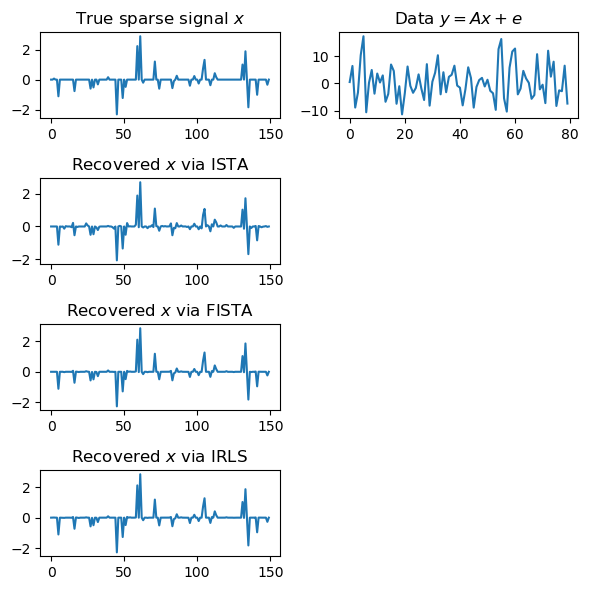

In [5]:
close("all")
figure(1,figsize=(6,6))

subplot(421); plot(xt);  title(L"True sparse signal $x$")
subplot(422); plot(y);   title(L"Data $y = A x + e$")
subplot(423); plot(x1);  title(L"Recovered $x$ via ISTA")
subplot(425); plot(x2);  title(L"Recovered $x$ via FISTA")
subplot(427); plot(x3);  title(L"Recovered $x$ via IRLS")


tight_layout()

savefig("comparison.pdf")
rmse(a,b) = sum((a-b).^2)/sum(b.^2)

@printf "rmse for ISTA    %8.5f  \n" 100*rmse(x1,xt);
@printf "rmse for FISTA   %8.5f  \n" 100*rmse(x2,xt);
@printf "rmse for IRLS    %8.5f  \n" 100*rmse(x3,xt);
gcf()

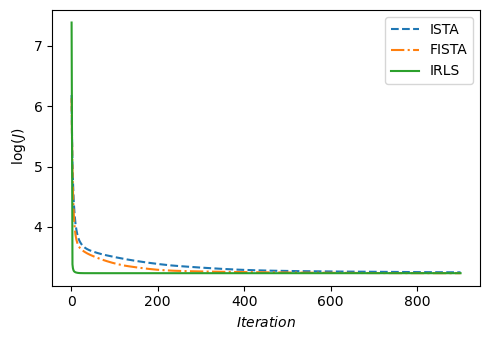

In [9]:
close("all")
figure(2,figsize=(5,3.5))
k=collect(1:1:length(J1))
plot(k, log.(J1), "--", k, log.(J2), "-.", k, log.(J3))
#ylim([18,350])
legend(["ISTA", "FISTA", "IRLS"])
minimum(J1)
xlabel(L"Iteration")
ylabel(L" $\log(J)$")
savefig("convergence.pdf")
tight_layout()
gcf()

## Soft Thresholding Operator


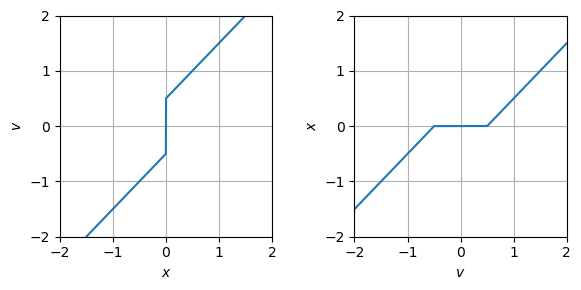

In [10]:

using PyPlot
close("all")
figure(2,figsize=(6,3))
x=collect(-2:0.001:2)
a=0.5
v=zeros(length(x))
v = x.+a*sign.(x)
subplot(121);plot(x,v);grid("on");xlim([-2,2]);ylim([-2,2])
xlabel(L"x");ylabel(L"v");
v=collect(-2:0.001:2)
Soft(u,alpha) = sign(u)*max(abs(u)-alpha, 0)

subplot(122);plot(v,Soft.(v,a));grid("on")
xlabel(L"v");ylabel(L"x");
tight_layout();xlim([-2,2]);ylim([-2,2])
savefig("soft.pdf")
gcf()